<a href="https://colab.research.google.com/github/Kate-Strydom/cse450/blob/main/MNIST_Handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MNIST dataset for handwritten digit recognition.

"The MNIST dataset consists of images of digits from a variety of scanned documents. Each image is a 28X28 pixel square. In this dataset 60,000 images are used to train the model and 10,000 images are used to test the model. There are 10 digits (0 to 9) or 10 classes to predict."

https://www.analyticsvidhya.com/blog/2021/06/image-processing-using-cnn-a-beginners-guide/:

###load libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt
import datetime

In [ ]:
# train and test
(X_train,y_train), (X_test, y_test)= mnist.load_data()

In [ ]:
print("Train X: ", X_train.shape)
print("Train y: ", y_train.shape)
print("Test X: ", X_test.shape)
print("Test y: ", y_test.shape)

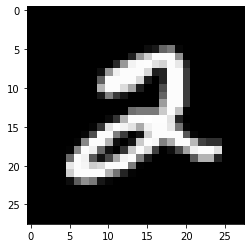

In [13]:
# Example of an image
plt.subplot()
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))

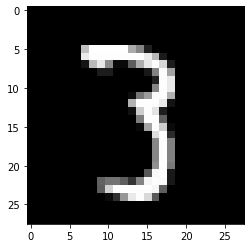

In [15]:
plt.imshow(X_train[356], cmap=plt.get_cmap('gray'))

### Data processing

28 x 28 pixel squared = 784 number of neurons for input

784 neurons for the hidden layer

10 neurons for the output

In [18]:
# reshaped the data
no_pixels=X_train.shape[1]*X_train.shape[2] 
X_train=X_train.reshape(X_train.shape[0], no_pixels).astype('float32')
X_test=X_test.reshape(X_test.shape[0], no_pixels).astype('float32')

In [19]:
#normalisation of the data 
# change from 0-255 to 0-1
X_train=X_train/255
X_test=X_test/255
# one hot encoding 
y_train= np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)
no_classes=y_train.shape[1]
print(no_classes)

10


###Define the model function

In [1]:
# Load the TensorBoard notebook extension
%reload_ext tensorboard
import datetime

#create directory and callbacks
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

NameError: ignored

In [43]:
# Build a baseline model...
#There are two layers one is a hidden layer with activation function ReLu 
#and the other one is the output layer using the softmax function.
nn = tf.keras.Sequential([
    layers.Conv2D(filters=64, padding='same', kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Dense(no_pixels, input_dim=no_pixels, activation='relu'),
    layers.Dense(no_classes, activation='softmax')])

In [44]:
nn.compile(optimizer='adam',
            loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics= ['accuracy'])


In [61]:
history =nn.fit(X_train, y_train,
        steps_per_epoch=200,
        epochs=70,
        batch_size = 10,
        validation_data=(X_test, y_test))

Epoch 1/70


TypeError: ignored

In [35]:
# run the model
model=nn_model()
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=10, batch_size=200, verbose=2)
score= model.evaluate(X_test, y_test, verbose=0)
print('The error is: %.2f%%'%(100-score[1]*100))

TypeError: ignored

In [ ]:
# evaluate the model
score= model.evaluate(X_test, y_test, verbose=0)
print('The error is: %.2f%%'%(100-score[1]*100))